In [33]:
import glob
import shutil

In [34]:
book_list1 = glob.glob('*1_ingest_data*')  # The asterisk is a wildcard that will account for any characters  before and after 'book2' 
book_list2 = glob.glob('*2_clean_data*')  # The asterisk is a wildcard that will account for any characters  before and after 'book2' 
i1 = len(book_list1) - 1     # we get the last item of a list by getting the length and subtracting 1, because all lists start indexing at 0
i2 = len(book_list2) - 1     # we get the last item of a list by getting the length and subtracting 1, because all lists start indexing at 0

In [35]:
source = book_list1[i1]     # the file we're copying
destination = 'book_1.ipynb'   # the new file without the version number, underscore differentiates from original file
print(source, destination)
_=shutil.copy(source, destination)  # by adding _= before shutil, we can suppress the annoying output 

1_ingest_data.ipynb book_1.ipynb


In [36]:
source = book_list2[i2]     # the file we're copying
destination = 'book_2.ipynb'   # the new file without the version number, underscore differentiates from original file
print(source, destination)
_=shutil.copy(source, destination)  # by adding _= before shutil, we can suppress the annoying output 

2_clean_data.ipynb book_2.ipynb


In [37]:
%run book_1.ipynb            # now we can run the notebook file, and not worry about changing the code to account for the new version


In [38]:
%run book_2.ipynb            # now we can run the notebook file, and not worry about changing the code to account for the new version

1_ingest_data.ipynb book_1.ipynb


In [39]:
data

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen        39.10000       18.70000         181.000000   
1    Adelie  Torgersen        39.50000       17.40000         186.000000   
2    Adelie  Torgersen        40.30000       18.00000         195.000000   
3    Adelie  Torgersen        43.92193       17.15117         200.915205   
4    Adelie  Torgersen        36.70000       19.30000         193.000000   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe        43.92193       17.15117         200.915205   
340  Gentoo     Biscoe        46.80000       14.30000         215.000000   
341  Gentoo     Biscoe        50.40000       15.70000         222.000000   
342  Gentoo     Biscoe        45.20000       14.80000         212.000000   
343  Gentoo     Biscoe        49.90000       16.10000         213.000000   

     body_mass_g     sex  
0    3750.000000    Male  
1    3800.000000  Female  
2    3250.000000  Female  
3    4201.754386    Male  
4    3450.000000  Female  
..           ...     ...  
339  4201.754386    Male  
340  4850.000000  Female  
341  5750.000000    Male  
342  5200.000000  Female  
343  5400.000000    Male  

[344 rows x 7 columns]

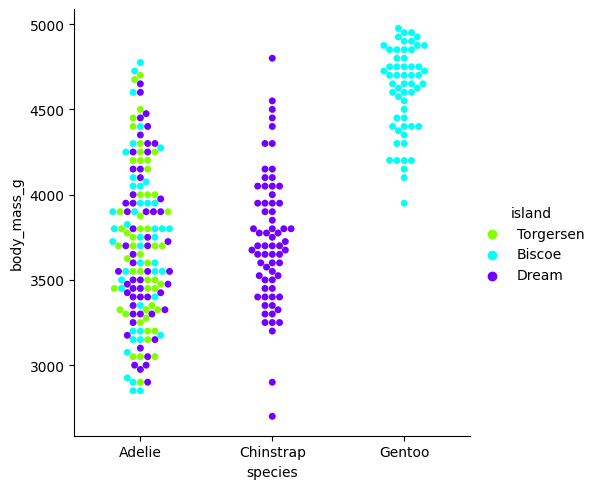

In [40]:
viz = sns.catplot(
    kind = "swarm",
    #kind = "strip",
    #kind = "box",
    #kind = "boxen"
    #kind = "point"
    #kind = "bar", orient = "h",
    #kind = "violin", split = True, inner = "stick",
    x = "species", 
    y = "body_mass_g",
    hue = "island",
    palette = "hsv",
    data = data.query("body_mass_g > 3500" and "body_mass_g < 5000")
)

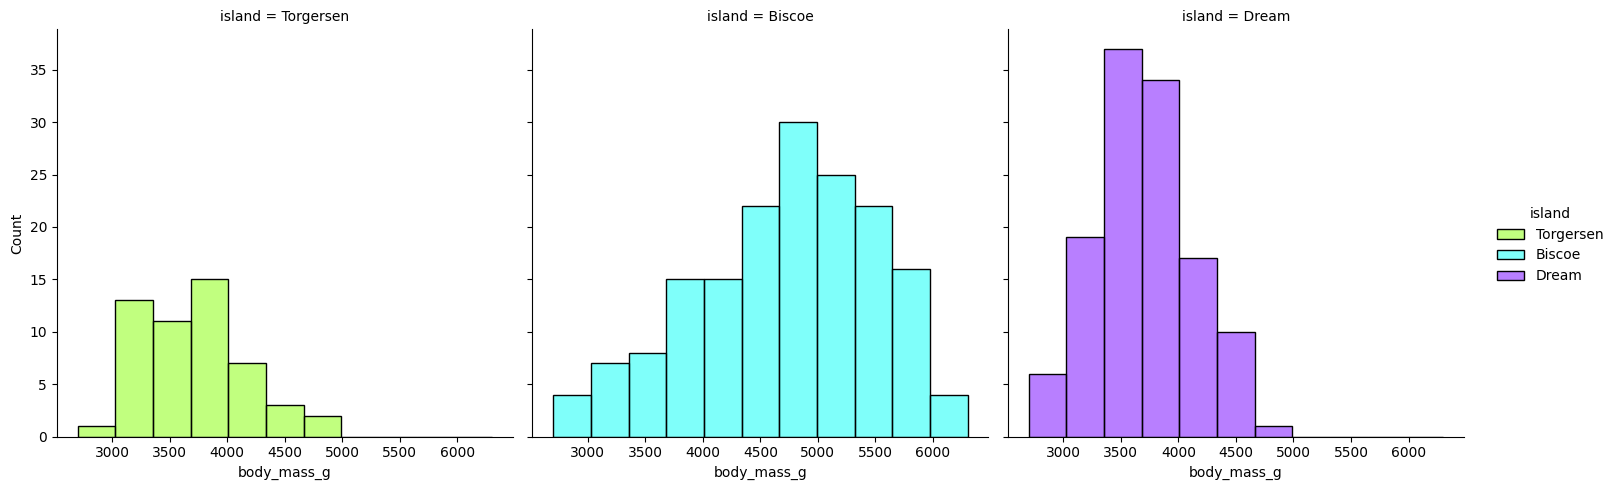

In [42]:
viz = sns.displot(
    data = data,  
    kind = "hist",
    #kind = "kde",
    #kind = "ecdf"
    col = "island",
    x = "body_mass_g",
    hue = "island",
    palette = "hsv"
)

Plot figures with multiple graphs

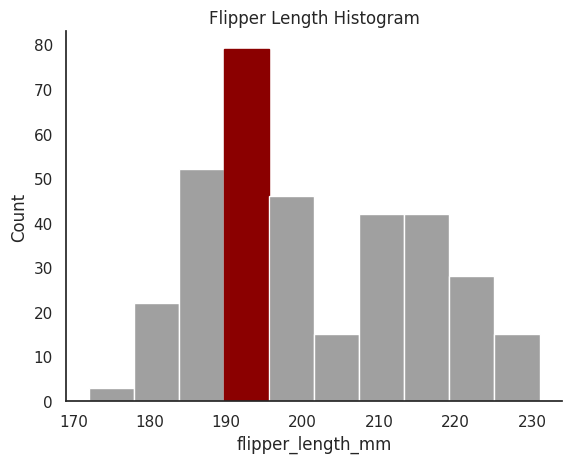

In [45]:
#HISTOGRAM comparison- 
sns.set_theme(style="white", rc={"axes.spines.right" : False, "axes.spines.top" : False}, font="DejaVu Sans")
ax = sns.histplot(x = "flipper_length_mm", color = "gray", data = data)
heights = [p.get_height() for p in ax.patches]
highest = sorted(heights)[len(heights)-1]
for p in ax.patches:
    if  p.get_height() == highest:
        p.set_color('darkred')
plt.title("Flipper Length Histogram")
plt.show()

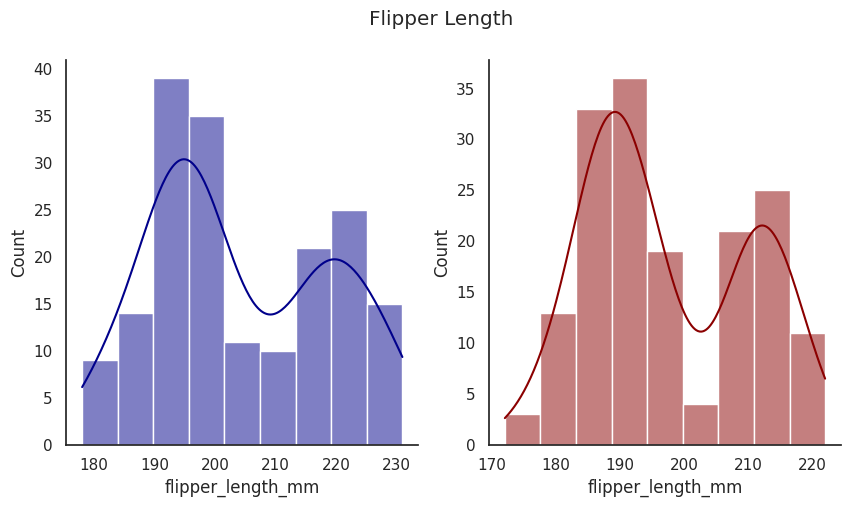

In [47]:
#HISTOGRAM comparison- 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
sns.histplot(ax = ax[0], x = "flipper_length_mm", kde = True, color = "darkblue", data = data[(data.sex == "Male")])
sns.histplot(ax = ax[1], x = "flipper_length_mm", kde = True, color = "darkred", data = data[(data.sex == "Female")])
plt.suptitle("Flipper Length")
plt.show()

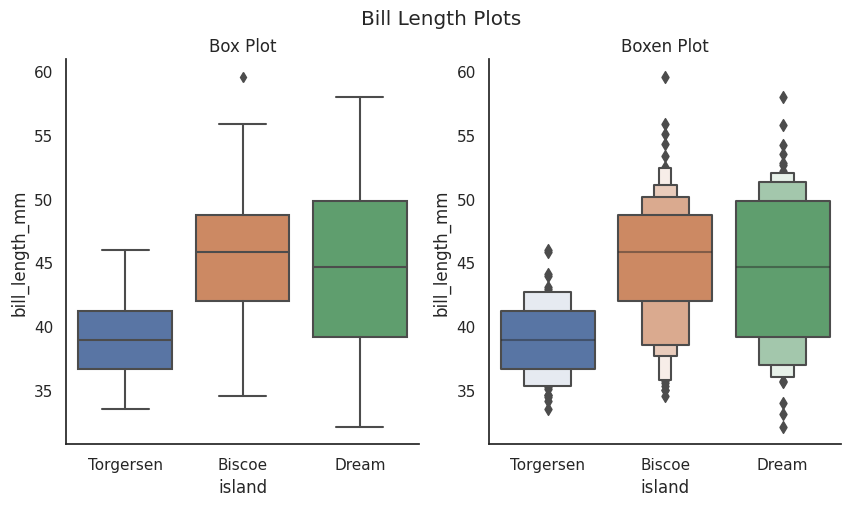

In [48]:
#BOX comparison-
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10, 5))
#BOX
viz_box = sns.boxplot(data = data, x = "island", y = "bill_length_mm", ax = ax[0])
#BOXEN
viz_boxen = sns.boxenplot(data = data, x = "island", y = "bill_length_mm", ax = ax[1])
ax[0].set_title("Box Plot")
ax[1].set_title("Boxen Plot")
plt.suptitle("Bill Length Plots")
plt.show()

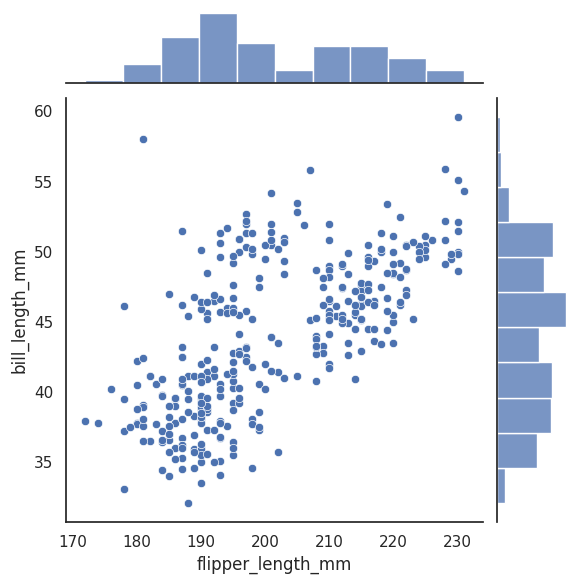

In [50]:
sns.jointplot(data=data, x = "flipper_length_mm", y = "bill_length_mm")

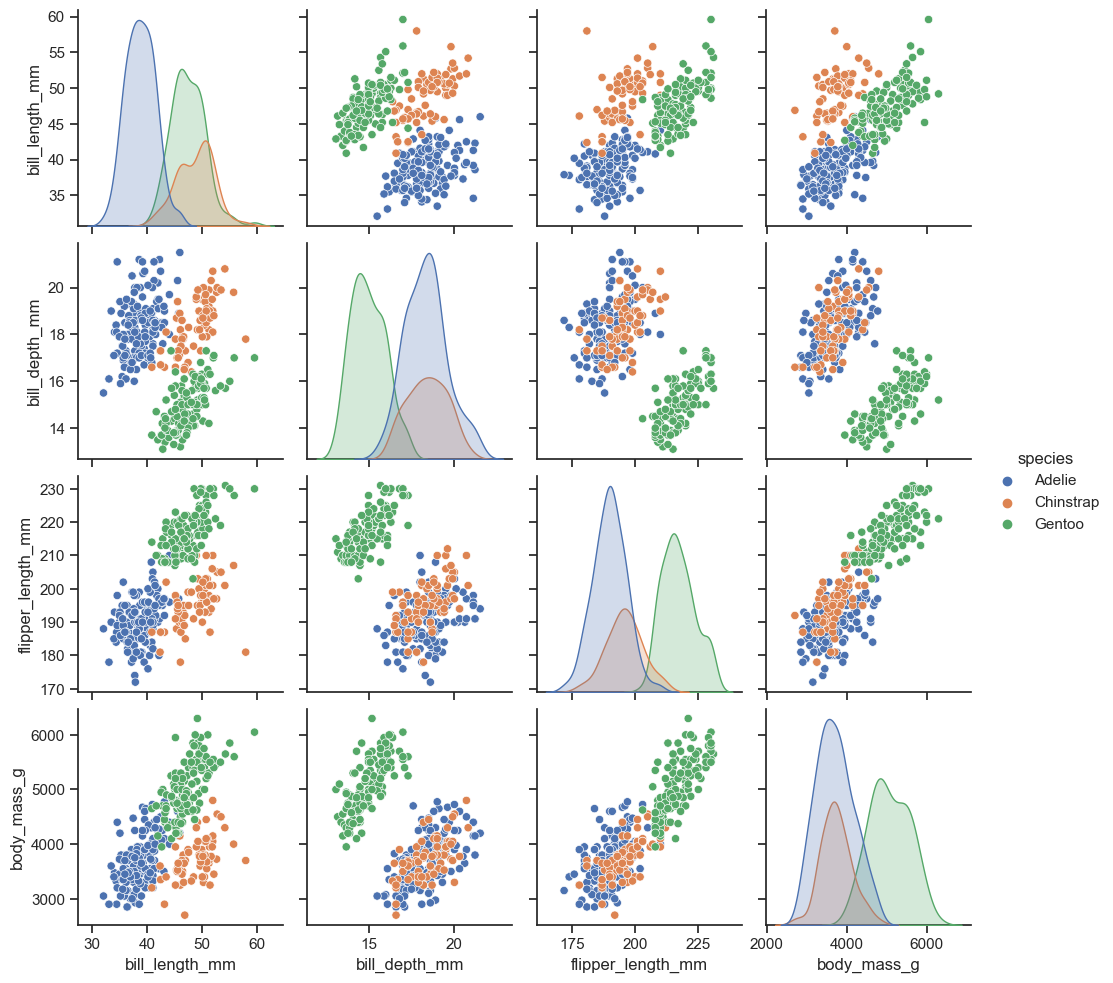

In [51]:
#PAIRPLOT
sns.set_theme(style="ticks")
df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

<AxesSubplot: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

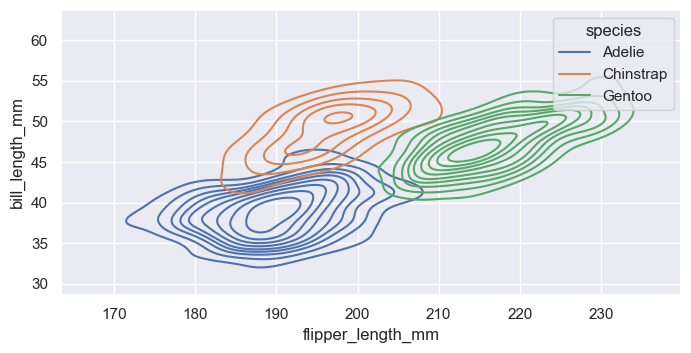

In [52]:
#KDE PLOT
sns.set_theme(style="darkgrid")
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")
# Draw a contour plot to represent each bivariate density
sns.kdeplot(data=data, x="flipper_length_mm", y="bill_length_mm", hue="species", thresh=.1)

Plot more complicated graphs

C:\Users\hruss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\hruss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\hruss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


Text(0.5, 0.98, 'Flipper Length Ridgeline Plot')

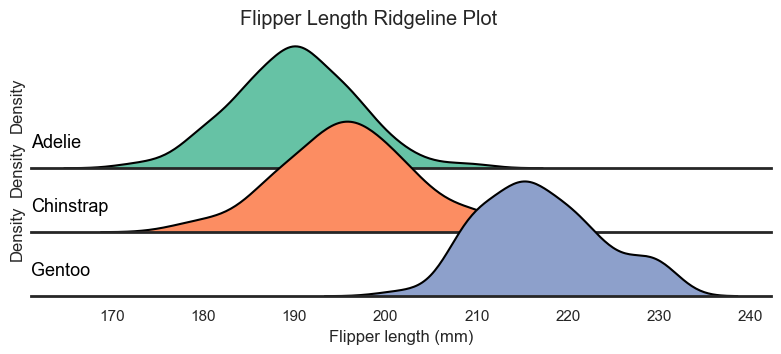

In [53]:
#RIDGELINE
species = ['Adelie', 'Chinstrap', 'Gentoo']
df_filtered = data[data['species'].isin(species)]
df_filtered
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df_filtered, palette=palette, row="species", hue="species", aspect=7, height=1.2)
g.map_dataframe(sns.kdeplot, x="flipper_length_mm", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="flipper_length_mm", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
g.map(label, "species")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Flipper length (mm)")
g.despine( left=True)
plt.suptitle('Flipper Length Ridgeline Plot', y=0.98)

"\nsns.boxplot(x='flipper_length_mm', y='species', data=data, width=0.25, showfliers=False, showmeans=True, \n            meanprops=dict(marker='o', markerfacecolor='darkorange', markersize=10, zorder=3),\n            boxprops=dict(facecolor=(0,0,0,0), linewidth=3, zorder=3), whiskerprops=dict(linewidth=3), \n            capprops=dict(linewidth=3), medianprops=dict(linewidth=3))\nplt.legend(frameon=False, fontsize=15, loc='upper right')\nadd_cosmetics()\n"

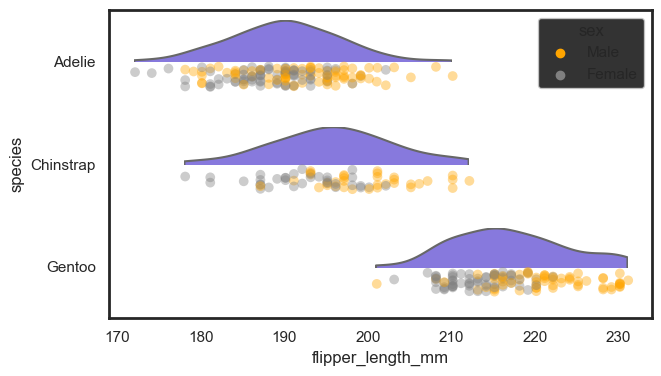

In [55]:
#RAINCLOUD
def add_cosmetics(title='Penguin Flipper Length Raincloud Plot', xlabel='Flipper length', ylabel='Species'):
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sns.despine()
plt.figure(figsize=(7, 4))
# Create violin plots without mini-boxplots inside.
ax = sns.violinplot(x='flipper_length_mm', y='species', data=data, color='mediumslateblue', cut=0, inner=None)
# Clip the lower half of each violin.
for item in ax.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width, height/2, transform=ax.transData))
# Create strip plots with partially transparent points of different colors depending on the group.
num_items = len(ax.collections)
sns.stripplot(x='flipper_length_mm', y='species', hue='sex', data=data, palette=['orange', 'gray'], alpha=0.4, size=7)
# Shift each strip plot strictly below the correponding volin.
for item in ax.collections[num_items:]: item.set_offsets(item.get_offsets() + 0.15)
# Create narrow boxplots on top of the corresponding violin and strip plots, with thick lines, the mean values, without the outliers.
'''
sns.boxplot(x='flipper_length_mm', y='species', data=data, width=0.25, showfliers=False, showmeans=True, 
            meanprops=dict(marker='o', markerfacecolor='darkorange', markersize=10, zorder=3),
            boxprops=dict(facecolor=(0,0,0,0), linewidth=3, zorder=3), whiskerprops=dict(linewidth=3), 
            capprops=dict(linewidth=3), medianprops=dict(linewidth=3))
plt.legend(frameon=False, fontsize=15, loc='upper right')
add_cosmetics()
'''